# Divisor Resistivo con Algoritmos Evolutivos



## Introducción a los Algoritmos Evolutivos

Los algoritmos evolutivos (EA, por sus siglas en inglés) son una clase de algoritmos inspirados en los principios de la evolución natural, como la selección, la reproducción y la mutación. Su objetivo es encontrar soluciones aproximadas a problemas complejos mediante la exploración iterativa de un conjunto de soluciones posibles, conocidas como población.

A lo largo de varias generaciones, los individuos de la población (soluciones candidatas) se evalúan mediante una función de aptitud (*fitness*), que cuantifica su calidad respecto al problema que se quiere resolver. A partir de ahí, se aplican operadores como:

- **Selección**: Elige los mejores individuos (o los más prometedores) para reproducirse.
- **Cruce** (*crossover*): Combina características de dos padres para generar descendencia.
- **Mutación**: Introduce variaciones aleatorias para mantener la diversidad genética.
- **Elitismo**: Opción que permite conservar el mejor individuo de cada generación para no perder soluciones óptimas encontradas.

Este enfoque es útil cuando no existe una fórmula directa para resolver el problema o cuando la búsqueda exhaustiva sería inviable por su complejidad.

---

## Planteamiento del Problema

Este notebook aplica un algoritmo evolutivo para diseñar un divisor de tensión con resistencias reales comerciales. El objetivo es encontrar valores de resistencias \( R_1 \) y \( R_2 \) pertenecientes a la serie E12 que, al aplicarse en un divisor conectado a una tensión de entrada \( V_in \), proporcionen una tensión de salida lo más cercana posible a un valor deseado \( V_target \).

<p align="center">
  <img src="https://www.electrontools.com/Home/WP/wp-content/uploads/2016/04/Resistencia.png" alt="Símbolo de resistencia" width="500"/>
</p>

Además, se impone una restricción adicional: la corriente total que atraviesa el divisor debe ser inferior a un umbral máximo especificado por el usuario, en este caso 10 mA. Esto se hace para evitar consumos innecesarios en aplicaciones sensibles al consumo energético, como sistemas embebidos o portátiles.


### Consideraciones sobre el uso de algoritmos evolutivos

El problema que se plantea en este ejemplo —encontrar dos resistencias de la serie E12 que permitan obtener una tensión de salida determinada a partir de un divisor de tensión— es, en realidad, un problema simple con un espacio de búsqueda finito y relativamente pequeño. Por tanto, puede resolverse de forma óptima mediante un enfoque de búsqueda exhaustiva (también conocido como fuerza bruta), evaluando todas las combinaciones posibles y seleccionando la mejor según un criterio objetivo (por ejemplo, el menor error y una corriente dentro del límite permitido).

Sin embargo, en este notebook utilizamos este problema como caso de estudio didáctico para ilustrar el funcionamiento de los algoritmos evolutivos, que se inspiran en los procesos biológicos de evolución natural. Estos algoritmos son especialmente útiles cuando el espacio de búsqueda es demasiado grande, complejo o mal definido como para abordarlo con métodos deterministas.

De este modo, aunque la búsqueda evolutiva no garantiza encontrar el resultado óptimo en todos los casos, sí permite hallar soluciones suficientemente buenas en tiempos razonables, incluso cuando se introducen múltiples restricciones, incertidumbre o funciones objetivo no triviales. Por tanto, este ejemplo debe entenderse como una introducción práctica a la lógica y el comportamiento de este tipo de algoritmos, más que como una justificación de su uso en problemas sencillos como este.

---


## Funcionamiento del Programa

El programa genera una población inicial de posibles pares de resistencias [\( R_1, R_2 \)] y evalúa en cada generación:

- La tensión de salida obtenida con ese par de resistencias.
- El error absoluto respecto a la tensión deseada.
- La corriente total en el divisor.
- Penalizaciones si se supera la corriente máxima permitida.

En cada generación:
- Se seleccionan los mejores candidatos mediante torneos aleatorios.
- Se combinan mediante cruces simples y posibles mutaciones.
- Si se activa el elitismo, el mejor individuo de la generación anterior se conserva automáticamente.

El proceso se repite durante un número de generaciones definido por el usuario.

Al finalizar, el programa:

- Muestra la mejor solución obtenida.
- Indica los valores de \( R_1 \), \( R_2 \), \( V_out \) y la corriente resultante.
- Representa gráficamente la evolución del error a lo largo de las generaciones.

---

## Parámetros Configurables

- `V_in`: Tensión de entrada al divisor.
- `V_target`: Tensión de salida deseada.
- `max_current_mA`: Corriente máxima permitida en el divisor.
- `population_size`: Número de individuos en cada generación.
- `generations`: Número total de generaciones a ejecutar.
- `mutation_rate`: Probabilidad de mutación por individuo.
- `elitism`: Booleano que activa o no la retención del mejor individuo.

---

## Reproducibilidad

El programa establece una semilla aleatoria fija (`semilla = 65`) que se aplica tanto a `numpy` como a `random`. Esto garantiza que, al ejecutar el programa con los mismos parámetros, los resultados sean reproducibles, algo especialmente útil para fines docentes, comparativos o científicos.

---


Gen 000 | R1 = 1.20 MΩ | R2 = 470.00 kΩ | Vout = 3.377 V | I =  0.01 mA | error = 0.0772 V
Gen 001 | R1 = 22.00 kΩ | R2 = 8.20 kΩ | Vout = 3.258 V | I =  0.40 mA | error = 0.0417 V
Gen 002 | R1 = 22.00 kΩ | R2 = 8.20 kΩ | Vout = 3.258 V | I =  0.40 mA | error = 0.0417 V
Gen 003 | R1 = 22.00 kΩ | R2 = 8.20 kΩ | Vout = 3.258 V | I =  0.40 mA | error = 0.0417 V
Gen 004 | R1 = 22.00 kΩ | R2 = 8.20 kΩ | Vout = 3.258 V | I =  0.40 mA | error = 0.0417 V
Gen 005 | R1 = 22.00 kΩ | R2 = 8.20 kΩ | Vout = 3.258 V | I =  0.40 mA | error = 0.0417 V
Gen 006 | R1 = 47.00 kΩ | R2 = 18.00 kΩ | Vout = 3.323 V | I =  0.18 mA | error = 0.0231 V
Gen 007 | R1 = 47.00 kΩ | R2 = 18.00 kΩ | Vout = 3.323 V | I =  0.18 mA | error = 0.0231 V
Gen 008 | R1 = 47.00 kΩ | R2 = 18.00 kΩ | Vout = 3.323 V | I =  0.18 mA | error = 0.0231 V
Gen 009 | R1 = 47.00 kΩ | R2 = 18.00 kΩ | Vout = 3.323 V | I =  0.18 mA | error = 0.0231 V
Gen 010 | R1 = 180.00 kΩ | R2 = 68.00 kΩ | Vout = 3.290 V | I =  0.05 mA | error = 0.0097 V
Gen

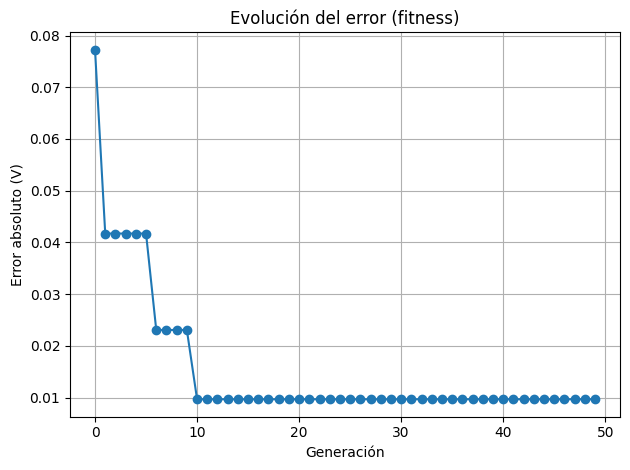

In [52]:
# ============================================================
# Nombre del programa: evolucion_divisor_tension_e12.py
# Función: Buscar dos resistencias de la serie E12 que formen
#          un divisor de tensión con una salida Vout cercana
#          al valor objetivo, limitando la corriente máxima.
# Técnica: Algoritmo evolutivo básico con cruce, mutación y elitismo.
# Autor: Alejandro Alonso Puig (https://github.com/aalonsopuig) + ChatGPT 4o
# Fecha: 28 de noviembre de 2025
# Licencia: Apache License 2.0
# ============================================================

# ===== Importación de librerías necesarias =====
import numpy as np                    # Para cálculos numéricos y arrays
import matplotlib.pyplot as plt       # Para generar gráficos
import random                         # Para selección, cruce y mutación

# ===== Inicializamos la semilla para que el notebook sea reproducible =====
semilla = 65                          # Valor de la semilla elegido
np.random.seed(semilla)              # Fijamos semilla para NumPy
random.seed(semilla)                 # Fijamos semilla para Random (usado en cruce y mutación)

# ===== Parámetros del problema del divisor de tensión =====
V_in = 12.0                           # Tensión de entrada (fija) en voltios
V_target = 3.3                        # Tensión de salida deseada
max_current_mA = 10.0                 # Corriente máxima permitida (en miliamperios)
max_current = max_current_mA / 1000  # Conversión a amperios

# ===== Generación de resistencias de la serie E12 (Ω, kΩ, MΩ) =====
e12_base = np.array([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2])
e12_resistors = []

for exp in range(0, 7):                     # Creamos resistencias desde 1Ω hasta 10 MΩ
    e12_resistors += list(e12_base * (10 ** exp))

e12_resistors = np.array(e12_resistors)     # Convertimos a array de Numpy

# ===== Parámetros del algoritmo evolutivo =====
population_size = 100                       # Número de individuos por generación
generations = 50                            # Total de generaciones a ejecutar
mutation_rate = 0.2                         # Probabilidad de mutación por gen
elitism = True                              # Si está activo, se conserva el mejor individuo

# ===== Función de evaluación (fitness): cuánto se aleja de la tensión deseada =====
def evaluate(individual):
    R1, R2 = individual
    V_out = V_in * R2 / (R1 + R2)           # Fórmula del divisor de tensión
    I = V_in / (R1 + R2)                    # Corriente total por el divisor

    if I > max_current:                     # Penalización si se excede corriente
        return 1e6

    error = abs(V_out - V_target)           # Error absoluto como función objetivo
    return error                            # Cuanto menor, mejor (minimización)

# ===== Crear un individuo aleatorio (dos resistencias E12) =====
def random_individual():
    return [random.choice(e12_resistors), random.choice(e12_resistors)]

# ===== Cruce genético simple: combina un valor de cada padre =====
def crossover(parent1, parent2):
    return [parent1[0], parent2[1]]         # Hijo mezcla R1 de uno y R2 del otro

# ===== Mutación aleatoria: cambia resistencia por otra de E12 =====
def mutate(individual):
    if random.random() < mutation_rate:     # Mutación de R1
        individual[0] = random.choice(e12_resistors)
    if random.random() < mutation_rate:     # Mutación de R2
        individual[1] = random.choice(e12_resistors)
    return individual

# ===== Representación textual amigable de una resistencia =====
def format_resistor(value):
    if value >= 1e6:
        return f"{value/1e6:.2f} MΩ"
    elif value >= 1e3:
        return f"{value/1e3:.2f} kΩ"
    else:
        return f"{value:.2f} Ω"

# ===== Inicialización de la población inicial =====
population = [random_individual() for _ in range(population_size)]

# ===== Variables para seguimiento del mejor individuo =====
best_fitness = []                    # Lista para almacenar mejor fitness de cada generación
best_solution = None
best_error = float("inf")

# ===== Bucle principal del algoritmo evolutivo =====
for gen in range(generations):
    scored = [(evaluate(ind), ind) for ind in population]  # Evaluar toda la población
    scored.sort(key=lambda x: x[0])                        # Ordenar por error (de menor a mayor)

    current_best = scored[0]                               # Mejor individuo de la generación
    best_fitness.append(current_best[0])                   # Guardar su fitness

    R1, R2 = current_best[1]
    V_out = V_in * R2 / (R1 + R2)
    I = V_in / (R1 + R2)
    error = abs(V_out - V_target)

    print(f"Gen {gen:03d} | R1 = {format_resistor(R1):>7} | R2 = {format_resistor(R2):>7} | "
          f"Vout = {V_out:5.3f} V | I = {I*1000:5.2f} mA | error = {error:.4f} V")

    if error < best_error and I <= max_current:
        best_error = error
        best_solution = current_best[1]                    # Guardamos mejor global

    # ===== Selección por torneo binario =====
    selected = [min(random.sample(scored, 2), key=lambda x: x[0])[1] for _ in range(population_size)]

    # ===== Generación de nueva población mediante cruce y mutación =====
    next_generation = []

    for i in range(0, population_size, 2):
        parent1, parent2 = selected[i], selected[i+1]
        child1 = mutate(crossover(parent1, parent2))       # Hijo 1
        child2 = mutate(crossover(parent2, parent1))       # Hijo 2
        next_generation.extend([child1, child2])

    # ===== Reemplazo con elitismo (opcional) =====
    if elitism:
        next_generation[0] = current_best[1]               # Sustituimos el primero por el mejor

    population = next_generation                           # La nueva generación se convierte en actual

# ===== Mostrar resultado final una vez terminado el bucle de generaciones =====
R1, R2 = best_solution
V_out = V_in * R2 / (R1 + R2)
I = V_in / (R1 + R2)

print("\n--- RESULTADO FINAL ---")
print(f"R1 = {format_resistor(R1)}")
print(f"R2 = {format_resistor(R2)}")
print(f"Vout = {V_out:.3f} V")
print(f"Corriente = {I*1000:.3f} mA")

# ===== Gráfica de evolución del error por generación =====
plt.plot(best_fitness, marker='o')
plt.xlabel('Generación')
plt.ylabel('Error absoluto (V)')
plt.title('Evolución del error (fitness)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Búsqueda exhaustiva (Fuerza bruta) en el diseño de un divisor de tensión

Este programa implementa una búsqueda exhaustiva (fuerza bruta) para seleccionar dos resistencias, R1 y R2, de la serie E12, de forma que:

- La tensión de salida del divisor (`Vout`) sea lo más cercana posible a un valor deseado (`Vtarget`), dado un valor de entrada (`Vin`).
- La corriente total que circula por el divisor (`I = Vin / (R1 + R2)`) no supere un valor máximo permitido (`Imax`), lo cual es importante en el diseño práctico de circuitos para evitar consumos innecesarios.

#### Serie E12
El programa utiliza la serie E12 estándar de valores comerciales de resistencias, escalados en distintas décadas (de 10 Ω hasta 1 MΩ), lo que da lugar a un conjunto discreto de valores permitidos.

#### Algoritmo utilizado
Se evalúan todas las combinaciones posibles de valores para R1 y R2 dentro de ese conjunto. Para cada combinación, se calcula:

- La tensión de salida `Vout`
- La corriente total `I`
- El error absoluto respecto al valor deseado de salida (`|Vout - Vtarget|`)

Si la corriente `I` no supera el límite, se considera esa solución como candidata. Se guarda la mejor combinación encontrada (es decir, la que produce el menor error).

#### Formato de salida
Los resultados se muestran en una forma legible, con resistencias expresadas automáticamente en ohmios (Ω), kiloohmios (kΩ) o megaohmios (MΩ) según su magnitud. También se muestra la corriente final en miliamperios (mA) y el error final en voltios (V).

#### Aplicaciones
Este enfoque puede utilizarse como base para comparar con métodos más eficientes como los algoritmos evolutivos, especialmente cuando el espacio de búsqueda crece o se aplican restricciones adicionales.


In [3]:
# ============================================================
# Nombre del programa: divisor_tension_exhaustivo.py
# Función: Buscar las mejores combinaciones de R1 y R2 en la serie E12
#          para obtener una tensión de salida cercana a un valor deseado
#          sin superar una corriente máxima permitida.
# Autor: Alejandro Alonso Puig (https://github.com/aalonsopuig) + ChatGPT 4o
# Fecha: 29 de noviembre de 2025
# Licencia: Apache License 2.0
# ============================================================

import itertools                                           # Para generar combinaciones
import numpy as np                                         # Para cálculos numéricos

# ===== Parámetros del problema =====
Vin = 12.0                                                 # Tensión de entrada en voltios
Vtarget = 3.3                                              # Tensión deseada de salida
Imax = 0.01                                                # Corriente máxima permitida en amperios

# ===== Serie E12 (valores base por década) =====
E12_base = [1.0, 1.2, 1.5, 1.8, 2.2, 2.7,
            3.3, 3.9, 4.7, 5.6, 6.8, 8.2]

# ===== Rango de décadas (de 10 Ω a 1 MΩ) =====
decades = [10**i for i in range(1, 7)]                     # [10, 100, 1000, ..., 1e6]

# ===== Generación del conjunto de resistencias =====
resistors = [round(base * mult, 2)                         # Redondeo a 2 decimales
             for mult in decades
             for base in E12_base]

# ===== Variables para guardar la mejor solución =====
best_error = float('inf')                                  # Inicializar con infinito
best_combo = None                                          # Guardar la mejor pareja (R1, R2)
best_vout = None                                           # Vout correspondiente
best_current = None                                        # Corriente correspondiente

# ===== Búsqueda exhaustiva de todas las combinaciones =====
for R1, R2 in itertools.product(resistors, repeat=2):      # Todas las combinaciones posibles
    Rt = R1 + R2                                           # Resistencia total
    I = Vin / Rt                                           # Corriente por el divisor
    if I > Imax:
        continue                                           # Se descartan por exceso de corriente
    Vout = Vin * R2 / Rt                                   # Tensión de salida
    error = abs(Vout - Vtarget)                            # Error absoluto

    if error < best_error:                                 # ¿Mejora la solución anterior?
        best_error = error
        best_combo = (R1, R2)
        best_vout = Vout
        best_current = I

# ===== Mostrar resultados =====

def format_resistor(value):
    """Devuelve una cadena con la unidad adecuada (Ω, kΩ, MΩ)"""
    if value >= 1e6:
        return f"{value / 1e6:.2f} MΩ"
    elif value >= 1e3:
        return f"{value / 1e3:.2f} kΩ"
    else:
        return f"{value:.2f} Ω"

print("Mejor combinación encontrada:")
print(f"R1 = {format_resistor(best_combo[0])}")
print(f"R2 = {format_resistor(best_combo[1])}")
print(f"Vout = {best_vout:.3f} V")
print(f"I = {best_current * 1e3:.2f} mA")
print(f"Error = {best_error:.4f} V")


Mejor combinación encontrada:
R1 = 1.80 kΩ
R2 = 680.00 Ω
Vout = 3.290 V
I = 4.84 mA
Error = 0.0097 V


## Comparación entre los métodos evolutivo y exhaustivo

Al aplicar ambos enfoques de resolución —algoritmos evolutivos y búsqueda exhaustiva— al problema del divisor de tensión, se obtienen los siguientes resultados:

| Método                        | R1         | R2         | V<sub>out</sub> | Corriente  | Error       |
|------------------------------|------------|------------|-----------------|------------|-------------|
| Algoritmo evolutivo          | 180.00 kΩ  | 68.00 kΩ   | 3.290 V         | 0.048 mA   | 0.0097 V    |
| Búsqueda exhaustiva (fuerza bruta) | 1.80 kΩ    | 680.00 Ω   | 3.290 V         | 4.84 mA    | 0.0097 V    |


Ambas soluciones cumplen el objetivo de alcanzar una tensión de salida próxima al valor deseado (3.3 V), con un error muy bajo. Sin embargo, se observa una diferencia importante en la corriente total del divisor:

- El **método evolutivo** encuentra una solución con resistencias mucho mayores, lo que reduce significativamente el consumo de corriente (0.048 mA), respetando una restricción impuesta de no superar los 10 mA.
- El **método exhaustivo**, por su parte, encuentra una combinación con un menor error absoluto en la tensión de salida, pero a costa de una corriente mucho mayor (4.84 mA), aunque todavía dentro del límite aceptable.

Esto muestra cómo los algoritmos evolutivos pueden adaptarse fácilmente a múltiples objetivos o restricciones (por ejemplo, mantener bajo el consumo) incluso si sacrifican ligeramente la precisión. Además, permiten explorar soluciones razonables sin necesidad de evaluar exhaustivamente todo el espacio de búsqueda, lo cual resulta especialmente valioso en problemas más complejos.
